# Video requirements
5-10 minutes, preferably in Google Slides. Do requirements in canvas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

sns.set_style('whitegrid')

# Start
This is a dataset off of Kaggle that has 20000 of the top 10 songs of various Spotify and Youtube artists. They have a range of metrics measuring each song, as well as their performance of views and likes. This notebook will be focusing on what factors have the highest views/listens on the platform.
Here is the link to the original dataset: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

In [2]:
data = pd.read_csv('C:/Users/Cody/myCodeDir/Math 3080/Final Project/Spotify_Youtube.csv')
data = data.drop(axis=1, columns=["Unnamed: 0", "Album", "Url_spotify", "Uri", "Url_youtube", "Title", "Channel", "Description", "Comments"])
data.head()

Artist                                          Track Album_type  \
0  Gorillaz                                 Feel Good Inc.      album   
1  Gorillaz                                Rhinestone Eyes      album   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)     single   
3  Gorillaz                             On Melancholy Hill      album   
4  Gorillaz                                 Clint Eastwood      album   

   Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
0         0.818   0.705   6.0    -6.679       0.1770      0.008360   
1         0.676   0.703   8.0    -5.815       0.0302      0.086900   
2         0.695   0.923   1.0    -3.930       0.0522      0.042500   
3         0.689   0.739   2.0    -5.810       0.0260      0.000015   
4         0.663   0.694  10.0    -8.627       0.1710      0.025300   

   Instrumentalness  Liveness  Valence    Tempo  Duration_ms        Views  \
0          0.002330    0.6130    0.772  138.559     222640.0  693555221.0   
1          0.000687    0.0463    0.852   92.761     200173.0   72011645.0   
2          0.046900    0.1160    0.551  108.014     215150.0    8435055.0   
3          0.509000    0.0640    0.578  120.423     233867.0  211754952.0   
4          0.000000    0.0698    0.525  167.953     340920.0  618480958.0   

       Likes Licensed official_video        Stream  
0  6220896.0     True           True  1.040235e+09  
1  1079128.0     True           True  3.100837e+08  
2   282142.0     True           True  6.306347e+07  
3  1788577.0     True           True  4.346636e+08  
4  6197318.0     True           True  6.172597e+08

In [3]:
for column in data.columns:
    print(f'{data[column].isnull().sum()} {column}')
    
data = data.dropna(axis=0) 

for column in data.columns:
    print(f'{data[column].isnull().sum()} {column}')

0 Artist
0 Track
0 Album_type
2 Danceability
2 Energy
2 Key
2 Loudness
2 Speechiness
2 Acousticness
2 Instrumentalness
2 Liveness
2 Valence
2 Tempo
2 Duration_ms
470 Views
541 Likes
470 Licensed
470 official_video
576 Stream
0 Artist
0 Track
0 Album_type
0 Danceability
0 Energy
0 Key
0 Loudness
0 Speechiness
0 Acousticness
0 Instrumentalness
0 Liveness
0 Valence
0 Tempo
0 Duration_ms
0 Views
0 Likes
0 Licensed
0 official_video
0 Stream


## Stats vs. Views

### Removed variables
From the dataset above, after all the basic, generally non-number columns were removed, I graphed some below. 
I graphed most of the middle variables besides Key, Loudness, and Tempo. Key wasn't graphed because it can contain 12 different values, and should be overall irrelevant in every way, as every key is mathematically the same. Loudness is next, and this metric is measured as an average across the entire track. Loudness was removed because, as you can see in this first graph, it is generally a good predictor of how popular a track is, but what I know of the music industry means that this metric should be basically irrelevant as well. Mastering techniques (processes to get the music to sound better on any listening device) have gotten to the point where every major track is as loud as it can be, and the maximum loudness a track can be is 0db. 4/5 of the data fits above -10, and 1/4 of the data fits above -5, which as an average is impressively loud. So I decided to remove it as a factor.

Lastly, I removed tempo, for the same reason as Key; it's just a tool for musicians, and not really something that matters all that much. This variable should show up pretty well correlating with Energy and Danceability, so we don't need this in our preliminary graphs. 

Loudness < -10: 3526
Loudness > -5: 5133


Text(0.5, 1.0, 'Loudness vs. Views')

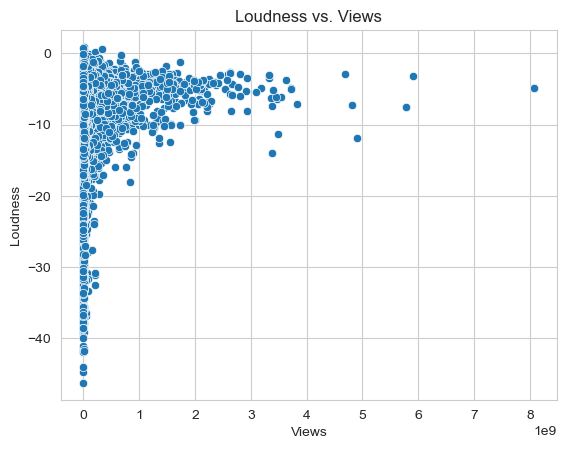

In [4]:
count = (data[data['Loudness'] < -10]).count().max()
print(f'Loudness < -10: {count}')
reallyloud = (data[data['Loudness'] > -5]).count().max()
print(f'Loudness > -5: {reallyloud}')
sns.scatterplot(data, x='Views', y='Loudness')
plt.title("Loudness vs. Views")

Text(0.5, 0.98, 'Other Variables vs. Views')

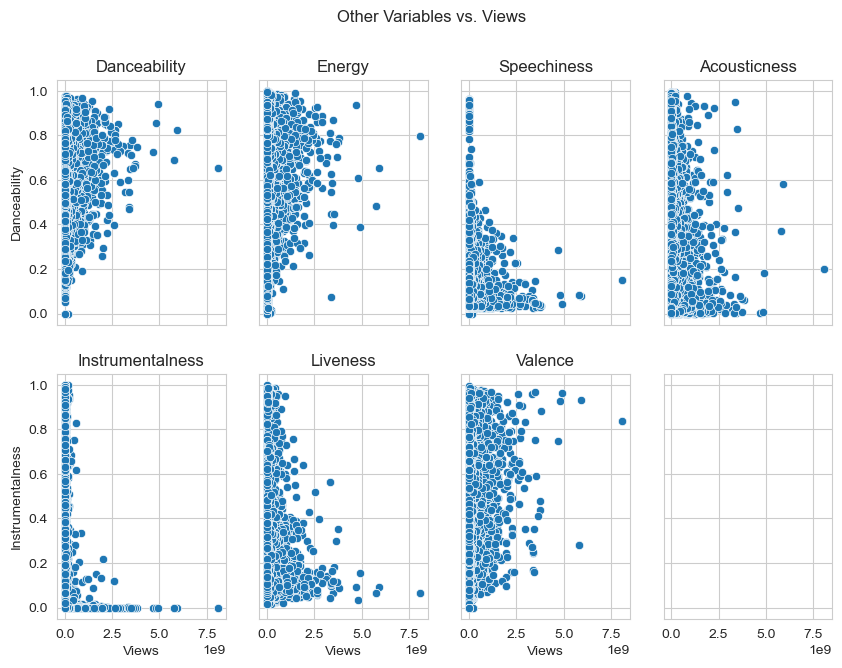

In [5]:
fig, ax = plt.subplots(2, 4, figsize=[10, 7], sharex=True, sharey=True)

ax[0, 0].set_title("Danceability")
sns.scatterplot(data, x='Views', y='Danceability', ax=ax[0,0], legend=False, )
ax[0, 1].set_title("Energy")
sns.scatterplot(data, x='Views', y='Energy', ax=ax[0,1], legend=False)
ax[0, 2].set_title("Speechiness")
sns.scatterplot(data, x='Views', y='Speechiness', ax=ax[0,2], legend=False)
ax[0, 3].set_title("Acousticness")
sns.scatterplot(data, x='Views', y='Acousticness', ax=ax[0,3], legend=False)
ax[1, 0].set_title("Instrumentalness")
sns.scatterplot(data, x='Views', y='Instrumentalness', ax=ax[1,0], legend=False)
ax[1, 1].set_title("Liveness")
sns.scatterplot(data, x='Views', y='Liveness', ax=ax[1,1], legend=False)
ax[1, 2].set_title("Valence")
sns.scatterplot(data, x='Views', y='Valence', ax=ax[1,2], legend=False)

fig.suptitle("Other Variables vs. Views")

Two of these show remarkably 1/x-type functions, so lets take a closer look at Speechiness and Instrumentalness.
Speechiness refers to how much of the audio is speaking; the dataset clarifies that values above 0.66 are probably talk-show likes, values between 0.33 and 0.66 are music-like, including rap, and values below 0.33 most likely represent music and non-talking tracks.

For Instrumentalness, the closer the value is to 0, the higher chance the audio contains some amount of singing/talking. On that inital graph, there's a remarkably high spike at 0.0, so the highest views came to videos or tracks that were not instrumental, which indicates to me some kind of pop song.

Will contain vocals: 17194


Text(0.5, 0.98, 'Heavily correlated variables (Speech and Instrumental-ness)')

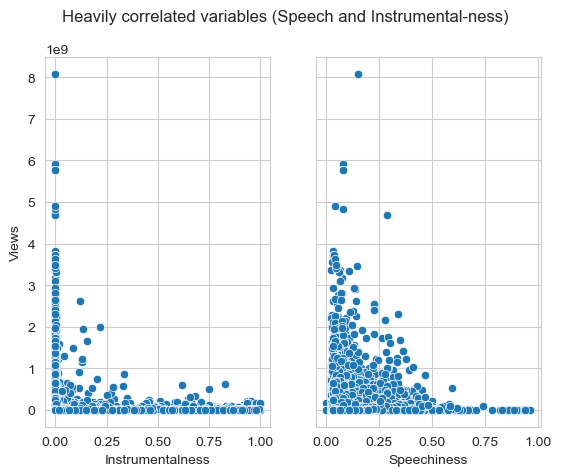

In [6]:
fig, ax = plt.subplots(1, 2, sharey=True)

sns.scatterplot(data, x='Instrumentalness', y='Views', ax=ax[0])
sns.scatterplot(data, x='Speechiness', y='Views', ax=ax[1])

containsvocals = (data[data['Instrumentalness'] < 0.02]).count().max()
print(f'Will contain vocals: {containsvocals}')

fig.suptitle("Heavily correlated variables (Speech and Instrumental-ness)")

As we can see by the count, the sheer amount of points with vocals may account for how many of them end up going viral; 9/10ths of the data in the set has an Instrumental score of essentially zero.

Let's look at another pair: Danceability and Liveliness. Danceability is a score of how danceable a track is, taking into account "tempo, rhythm stability, beat strength, and overall regularity". Liveliness is a score of how likely an audience is to be in the track.

Text(0.5, 0.98, 'Roughly correlated variables (Dance and Live-ness)')

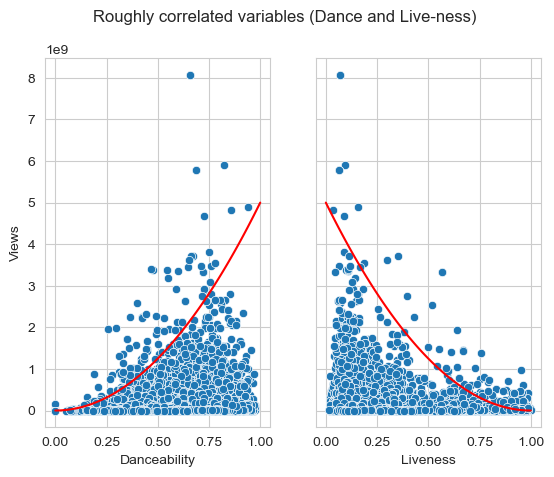

In [7]:
fig, ax = plt.subplots(1, 2, sharey=True)

sns.scatterplot(data, x='Danceability', y='Views', ax=ax[0])
sns.scatterplot(data, x='Liveness', y='Views', ax=ax[1])

x = np.linspace(0,1,100)
y = 5000000000*(x*x)
sns.lineplot(x=x, y=y, ax=ax[0], color='red')
y = 5000000000*(x*x) -10000000000*x + 5000000000
sns.lineplot(x=x, y=y, ax=ax[1], color='red')

fig.suptitle("Roughly correlated variables (Dance and Live-ness)")

With an increase in danceability, there's an uplift in the amount of views you recieve. With liveness, there's a decrease in the amount of views as liveness gets higher. In this model, success is part about having an audience at a party that wants to dance to your track, but also making sure the audience isn't baked into your track. 

There's three more variables to observe in this set against Views: Acousticness, Valence, and Energy. Acoustics are the chances that the track is an acoustic track, so no digital keyboards (think guitar-piano singer-songwriter combo). Valence is the "positivity" of a track, so higher scores are more happy-sounding with lower scores sounding more depressed, angry, etc. Energy is a measure of intensity and activity; heavy metal ranks high, classical music rates low. This is done by measuring "dynamic range, perceived loudness, timbre, onset rate, and general entropy".

Text(0.5, 0.98, 'Not very correlated (Acousticness, Valence, and Energy)')

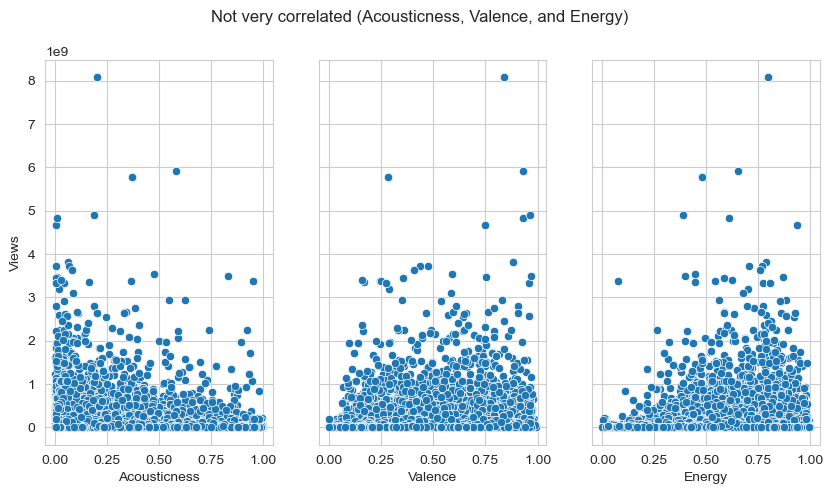

In [8]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=[10, 5])

sns.scatterplot(data, x='Acousticness', y='Views', ax=ax[0])
sns.scatterplot(data, x='Valence', y='Views', ax=ax[1])
sns.scatterplot(data, x='Energy', y='Views', ax=ax[2])

fig.suptitle("Not very correlated (Acousticness, Valence, and Energy)")

Acousticness has a slightly higher count in the low side, Energy has a slightly higher count in the high side, and Valence is basically a flat line, with low variation. If your track falls anywhere on these scales, it's likely you can still get a good view amount (>3 million). 

## Part 2: Variables vs. Variables
This next plot will be a PairGrid to view their correlation with each other. Just to make a bit more sense, a gentle palette has been added to show the views correlation on each plot.

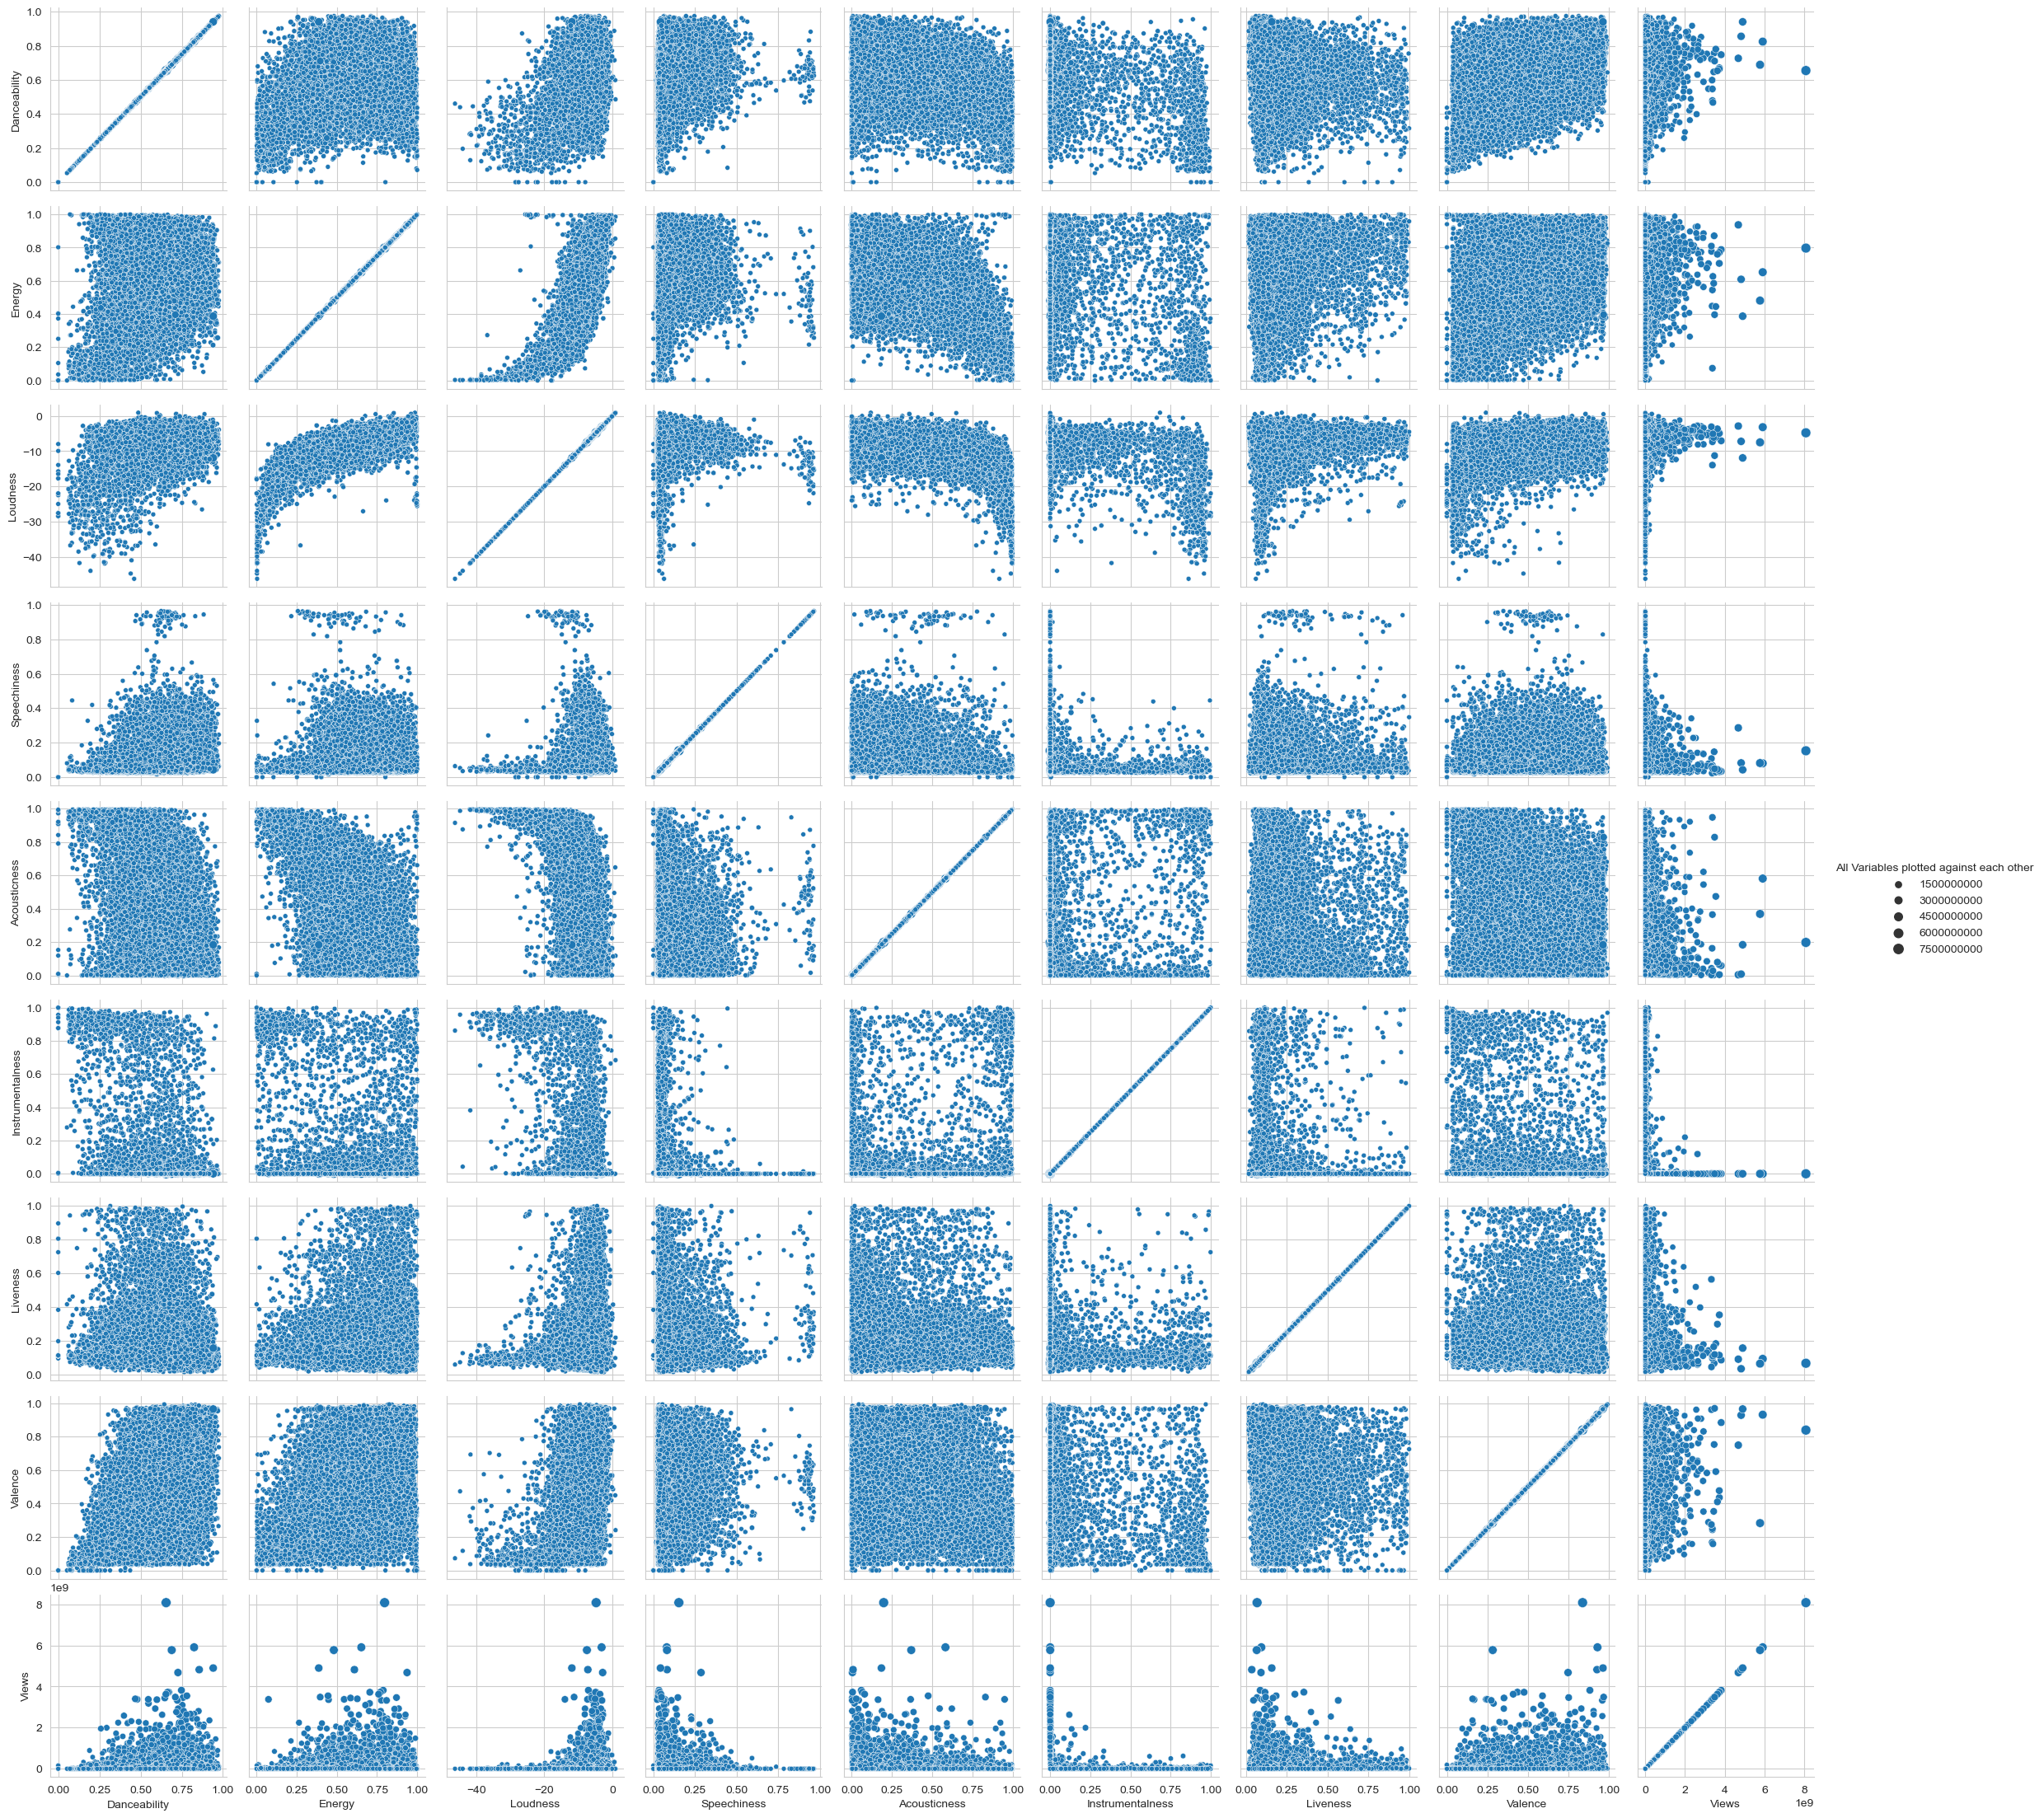

In [9]:
# innerData = data.iloc[:, 3:15]
# innerData = innerData.drop(axis=1, columns=['Key', 'Tempo', 'Duration_ms'])
# g = sns.PairGrid(innerData)
# g.map(sns.scatterplot, size=innerData['Views'])
# g.add_legend(title='All Variables plotted against each other')

<Axes: xlabel='Energy', ylabel='Loudness'>

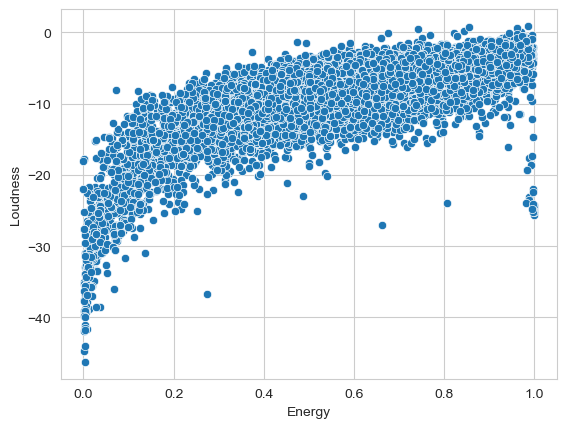

In [10]:
sns.scatterplot(data=data, x='Energy', y='Loudness')

<Axes: xlabel='Speechiness', ylabel='Valence'>

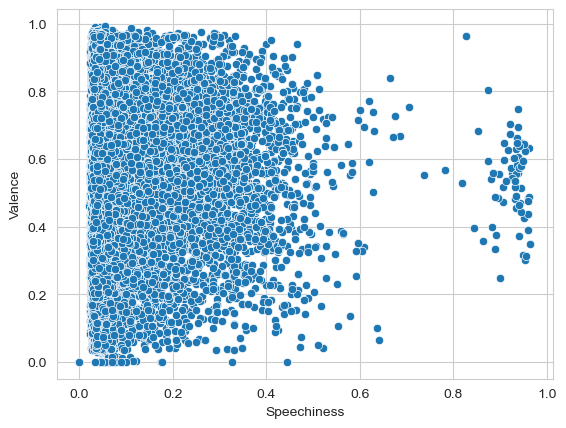

In [11]:
sns.scatterplot(data=data, x='Speechiness', y='Valence')

<Axes: xlabel='Acousticness', ylabel='Instrumentalness'>

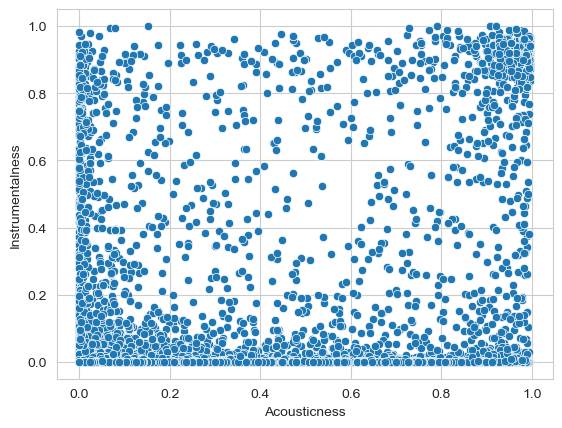

In [12]:
sns.scatterplot(data=data, x='Acousticness', y='Instrumentalness')

<Axes: xlabel='Acousticness', ylabel='Valence'>

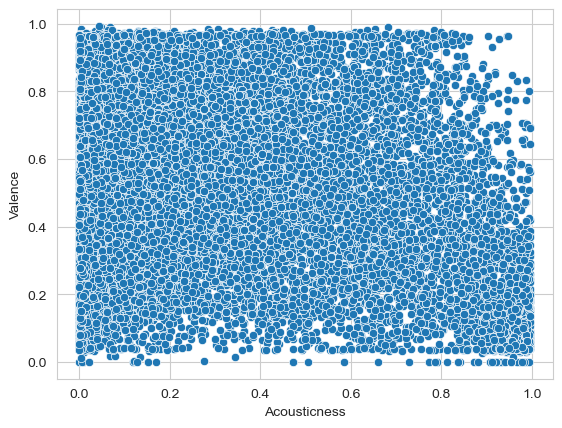

In [13]:
sns.scatterplot(data=data, x='Acousticness', y='Valence')

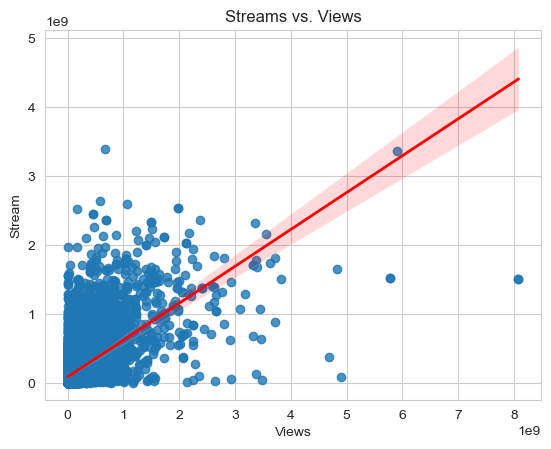

In [14]:
sns.regplot(data=data, x='Views', y='Stream', line_kws={"color":"r","alpha":1,"lw":2})
plt.title("Streams vs. Views")
plt.show()

## Part 3. Views by artist

In [57]:
artists = data.groupby("Artist").mean().round(4)
artists

C:\Users\Cody\AppData\Local\Temp\ipykernel_16660\2618059139.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Danceability  Energy     Key  Loudness  Speechiness  \
Artist                                                                
$NOT                  0.7580  0.6343  6.1000   -7.2974       0.2147   
$uicideboy$           0.7966  0.6832  5.4000   -6.5258       0.1416   
(G)I-DLE              0.6914  0.8153  5.4000   -3.7569       0.0968   
*NSYNC                0.6224  0.7697  7.1000   -5.7980       0.0575   
070 Shake             0.5873  0.6853  2.8000   -6.6400       0.1075   
...                      ...     ...     ...       ...          ...   
will.i.am             0.7890  0.7251  5.1111   -5.8299       0.0865   
Ángela Aguilar        0.7108  0.4972  5.8000   -5.6167       0.0297   
Ñejo                  0.7217  0.7366  5.5000   -5.4441       0.2067   
Ñengo Flow            0.7710  0.7865  4.8000   -4.7911       0.1723   
Øneheart              0.3468  0.1205  7.9000  -26.2996       0.0341   

                Acousticness  Instrumentalness  Liveness  Valence     Tempo  \
Artist                                                                        
$NOT                  0.2600            0.0263    0.1997   0.4980  117.5518   
$uicideboy$           0.1612            0.0007    0.1492   0.3379  116.8090   
(G)I-DLE              0.0298            0.0000    0.2086   0.4760  122.9143   
*NSYNC                0.1540            0.0002    0.2664   0.6874  131.8799   
070 Shake             0.0598            0.0046    0.1306   0.2414  126.1774   
...                      ...               ...       ...      ...       ...   
will.i.am             0.0977            0.0001    0.1045   0.5889  118.5836   
Ángela Aguilar        0.4952            0.0000    0.1717   0.6489  120.3246   
Ñejo                  0.3197            0.0015    0.2410   0.7196  138.4122   
Ñengo Flow            0.1156            0.0025    0.2646   0.6400  121.7857   
Øneheart              0.9235            0.8764    0.1955   0.0913  101.3855   

                Duration_ms         Views         Likes        Stream  
Artist                                                                 
$NOT            161723.0000  1.107849e+07  2.747163e+05  1.127638e+08  
$uicideboy$     164043.0000  3.341351e+07  3.576621e+05  2.126748e+08  
(G)I-DLE        189108.1000  1.754954e+08  2.446296e+06  1.304212e+08  
*NSYNC          235538.7000  1.027833e+08  4.233423e+05  1.427834e+08  
070 Shake       241366.1000  9.609936e+06  2.013005e+05  4.647486e+07  
...                     ...           ...           ...           ...  
will.i.am       244090.8889  3.145334e+08  1.539269e+06  1.513675e+08  
Ángela Aguilar  234247.2000  1.385295e+08  1.029476e+06  5.911520e+07  
Ñejo            277212.0000  6.266808e+07  4.348910e+05  5.275160e+07  
Ñengo Flow      234113.8000  8.127263e+07  6.760340e+05  1.497314e+08  
Øneheart        105274.0000  3.462331e+06  1.272167e+05  2.551994e+07  

[2041 rows x 14 columns]

In [59]:
artists = artists.reset_index()
fig = px.scatter(artists, x=artists['Views'], y=artists['Stream'],
                 log_x=True, log_y=True,
                 hover_data=['Artist', 'Danceability', 'Loudness', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Duration_ms', 'Views', 'Likes', 'Stream'],
                 title="Artists vs. Views & Streams")

fig.show()

fig.write_html("ArtistsvsViews.html")